In [1]:
import datetime as dt
import matplotlib.pyplot as plt 
import yfinance as yf
from enum import Enum

In [2]:
class order(Enum):
    BUY = 1
    SELL = -1
    HOLD = 0

In [3]:
ma_1 = 50
ma_2 = 200

start = dt.datetime.now() - dt.timedelta(days = 365*5)
end = dt.datetime.now()

stock_ticker = 'AAPL'

data = yf.download(stock_ticker,start , end)
print (data)

[*********************100%%**********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2018-09-25   54.937500   55.705002   54.924999   55.547501   53.199707   
2018-09-26   55.250000   55.937500   54.939999   55.105000   52.775925   
2018-09-27   55.955002   56.610001   55.884998   56.237499   53.860542   
2018-09-28   56.197498   56.459999   56.005001   56.435001   54.049690   
2018-10-01   56.987499   57.355000   56.587502   56.814999   54.413639   
...                ...         ...         ...         ...         ...   
2023-09-18  176.479996  179.380005  176.169998  177.970001  177.970001   
2023-09-19  177.520004  179.630005  177.130005  179.070007  179.070007   
2023-09-20  179.259995  179.699997  175.399994  175.490005  175.490005   
2023-09-21  174.550003  176.300003  173.860001  173.929993  173.929993   
2023-09-22  174.669998  177.078995  174.054

In [4]:
data[f'SMA_{ma_1}'] = data['Adj Close'].rolling(window = ma_1).mean()
data[f'SMA_{ma_2}'] = data['Adj Close'].rolling(window = ma_2).mean()
data = data.iloc[ma_2:]

In [5]:
buy_signals = []
sell_signals = []
trigger = order.HOLD

for x in range(len(data)):
    if data[f'SMA_{ma_1}'].iloc[x] > data[f'SMA_{ma_2}'].iloc[x] and trigger != order.BUY :
        buy_signals.append(data['Adj Close'].iloc[x])
        sell_signals.append(float('nan'))
        trigger = order.BUY
    elif data[f'SMA_{ma_1}'].iloc[x] < data[f'SMA_{ma_2}'].iloc[x] and trigger != order.SELL :
        buy_signals.append(float('nan'))
        sell_signals.append(data['Adj Close'].iloc[x])
        trigger = order.SELL
    else:
        buy_signals.append(float('nan'))
        sell_signals.append(float('nan'))

In [6]:
data['Buy Signals'] = buy_signals
data['Sell Signals'] = sell_signals

print(data)


                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2019-07-15   51.022499   51.467499   51.000000   51.302502   49.707718   
2019-07-16   51.147499   51.527500   50.875000   51.125000   49.535744   
2019-07-17   51.012501   51.272499   50.817501   50.837502   49.257187   
2019-07-18   51.000000   51.470001   50.924999   51.415001   49.816734   
2019-07-19   51.447498   51.625000   50.590000   50.647499   49.073086   
...                ...         ...         ...         ...         ...   
2023-09-18  176.479996  179.380005  176.169998  177.970001  177.970001   
2023-09-19  177.520004  179.630005  177.130005  179.070007  179.070007   
2023-09-20  179.259995  179.699997  175.399994  175.490005  175.490005   
2023-09-21  174.550003  176.300003  173.860001  173.929993  173.929993   
2023-09-22  174.669998  177.078995  174.054993  174.789993  174.789993   

              Volume      SMA_50     

C:\Users\Daniel aghanya\AppData\Local\Temp\ipykernel_5684\2782475123.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Buy Signals'] = buy_signals
C:\Users\Daniel aghanya\AppData\Local\Temp\ipykernel_5684\2782475123.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sell Signals'] = sell_signals


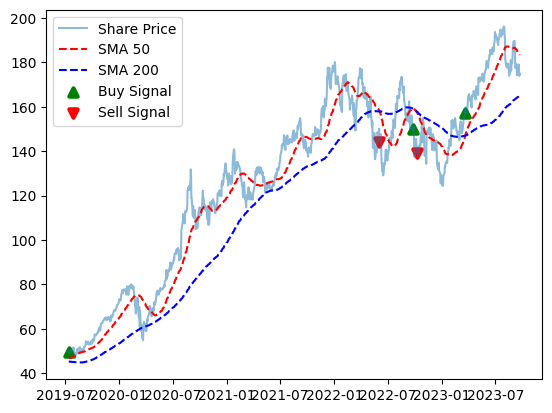

In [7]:
plt.plot(data['Adj Close'], label = "Share Price" , alpha = 0.5)
plt.plot(data[f'SMA_{ma_1}'],label = f"SMA {ma_1}",color = "red",linestyle = "--")
plt.plot(data[f'SMA_{ma_2}'],label = f"SMA {ma_2}",color = "blue",linestyle = "--")
plt.scatter(data.index,data['Buy Signals'],label = "Buy Signal", marker="^", color = "green", lw= 3)
plt.scatter(data.index,data['Sell Signals'],label = "Sell Signal", marker="v", color = "red", lw= 3)
plt.legend(loc = "upper left")
plt.show()

In [20]:
import pandas as pd
import numpy as np
import talib
# Load data
data = pd.DataFrame({
  'Close': [10, 12, 11, 9, 8, 13, 15, 14, 12, 13, 11]   
})

# Strategy parameters
short_window = 5
long_window = 10
stop_loss = 0.1

# Calculate SMAs
data['SMA_short'] = data['Close'].rolling(short_window).mean()
data['SMA_long'] = data['Close'].rolling(long_window).mean()

# Calculate RSI
data['RSI'] = 100 - (100 / (1 + np.exp(data['Close'].diff(1).dropna() / data['Close'].diff(14).dropna())))




# Generate signals
signals = data['SMA_short'] > data['SMA_long']
signals = signals.astype(int).replace([True, False], [1, -1])

# Stop loss logic 
for i in range(len(data)):
  if signals.iloc[i] == 1: # Long signal
    if data['Close'].iloc[i+1] < data['Close'].iloc[i] * (1 - stop_loss):
      signals.iloc[i+1] = 0 # Exit long
      
  elif signals.iloc[i] == -1: # Short signal  
    if data['Close'].iloc[i+1] > data['Close'].iloc[i] * (1 + stop_loss):
      signals.iloc[i+1] = 0 # Exit short

# Print signals        
#print(signals)



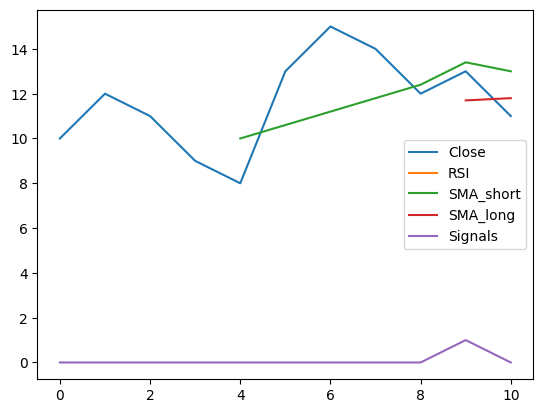

In [21]:
# Plot results
plt.plot(data['Close'], label='Close')
plt.plot(data['RSI'], label='RSI')
plt.plot(data['SMA_short'], label='SMA_short')
plt.plot(data['SMA_long'], label='SMA_long')
plt.plot(signals, label='Signals')
plt.legend()
plt.show()


In [25]:
ticker = "AAPL"
data = yf.download(ticker, start="2021-01-01", end="2023-03-08")

# Add the RSI indicator to the data
rsi = talib.RSI(data['Close'], 14)
data['RSI'] = rsi
print(data['RSI'] )

[*********************100%%**********************]  1 of 1 completed
Date
2021-01-04          NaN
2021-01-05          NaN
2021-01-06          NaN
2021-01-07          NaN
2021-01-08          NaN
                ...    
2023-03-01    45.764981
2023-03-02    47.118551
2023-03-03    56.984236
2023-03-06    61.242683
2023-03-07    56.449603
Name: RSI, Length: 547, dtype: float64


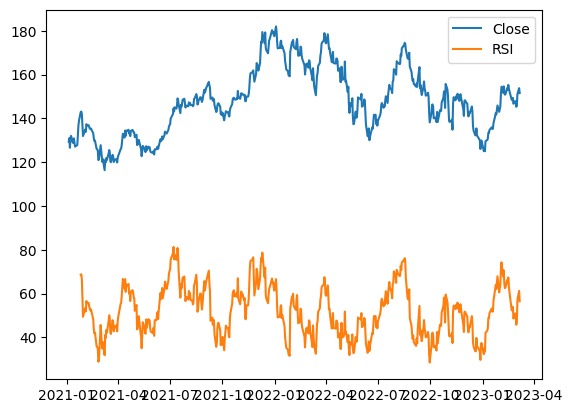

In [26]:
# Plot the data
plt.plot(data['Close'], label='Close')
plt.plot(data['RSI'], label='RSI')
plt.legend()
plt.show()

In [27]:
# Identify overbought and oversold conditions
overbought = data[data['RSI'] > 70]
oversold = data[data['RSI'] < 30]


In [30]:
# Print the overbought and oversold dates
print('Overbought dates:')
print(overbought)
print('Oversold dates:')
print(oversold)

Overbought dates:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-06-30  136.169998  137.410004  135.869995  136.960007  135.191055   
2021-07-01  136.600006  137.330002  135.759995  137.270004  135.497055   
2021-07-02  137.899994  140.000000  137.750000  139.960007  138.152328   
2021-07-06  140.070007  143.149994  140.070007  142.020004  140.185699   
2021-07-07  143.539993  144.889999  142.660004  144.570007  142.702789   
2021-07-08  141.580002  144.059998  140.669998  143.240005  141.389938   
2021-07-09  142.750000  145.649994  142.649994  145.110001  143.235764   
2021-07-12  146.210007  146.320007  144.000000  144.500000  142.633667   
2021-07-13  144.029999  147.460007  143.630005  145.639999  143.758911   
2021-07-14  148.100006  149.570007  147.679993  149.149994  147.223602   
2021-07-15  149.240005  150.000000  147.089996  148.479996  146.562271   
2021-07-16  148.4600

In [33]:

macd = talib.MACD(data['Close'], 12, 26, 9)
data['MACD'] = list(macd[0])
data['MACD_signal'] = list(macd[1])
data['MACD_hist'] = list(macd[2])


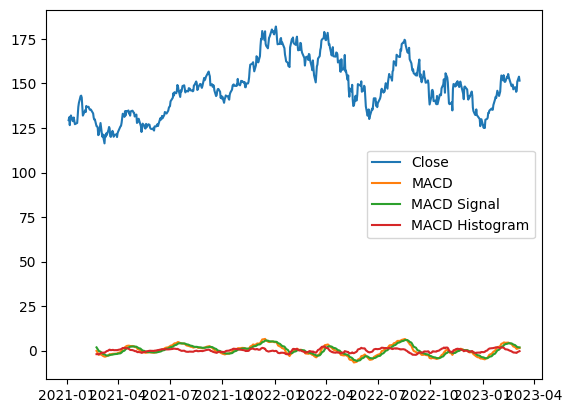

In [34]:
# Plot the data
plt.plot(data['Close'], label='Close')
plt.plot(data['MACD'], label='MACD')
plt.plot(data['MACD_signal'], label='MACD Signal')
plt.plot(data['MACD_hist'], label='MACD Histogram')
plt.legend()
plt.show()

In [36]:
# Identify bullish and bearish trends
bullish = data[data['MACD'] > data['MACD_signal']]
bearish = data[data['MACD'] < data['MACD_signal']]

# Print the bullish and bearish dates
print('Bullish:')
print(bullish)
print('Bearish:')
print(bearish)


Bullish dates:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-03-15  121.410004  124.000000  120.419998  123.989998  122.181038   
2021-03-16  125.699997  127.220001  124.720001  125.570000  123.737991   
2021-03-17  124.050003  125.860001  122.339996  124.760002  122.939804   
2021-03-18  122.879997  123.180000  120.320000  120.529999  118.771523   
2021-03-19  119.900002  121.430000  119.680000  119.989998  118.239403   
...                ...         ...         ...         ...         ...   
2023-02-13  150.949997  154.259995  150.919998  153.850006  153.430313   
2023-02-14  152.119995  153.770004  150.860001  153.199997  152.782074   
2023-02-15  153.110001  155.500000  152.880005  155.330002  154.906265   
2023-02-16  153.509995  156.330002  153.350006  153.710007  153.290680   
2023-02-17  152.350006  153.000000  150.850006  152.550003  152.133850   

               Volume 

In [38]:

# Print the bullish and bearish dates
print('Bullish dates:')
print(bullish[[ 'Open', 'High', 'Low', 'Close', 'Volume']])
print('Bearish dates:')
print(bearish[['Open', 'High', 'Low', 'Close', 'Volume']])


Bullish dates:
                  Open        High         Low       Close     Volume
Date                                                                 
2021-03-15  121.410004  124.000000  120.419998  123.989998   92403800
2021-03-16  125.699997  127.220001  124.720001  125.570000  115227900
2021-03-17  124.050003  125.860001  122.339996  124.760002  111932600
2021-03-18  122.879997  123.180000  120.320000  120.529999  121229700
2021-03-19  119.900002  121.430000  119.680000  119.989998  185549500
...                ...         ...         ...         ...        ...
2023-02-13  150.949997  154.259995  150.919998  153.850006   62199000
2023-02-14  152.119995  153.770004  150.860001  153.199997   61707600
2023-02-15  153.110001  155.500000  152.880005  155.330002   65573800
2023-02-16  153.509995  156.330002  153.350006  153.710007   68167900
2023-02-17  152.350006  153.000000  150.850006  152.550003   59144100

[242 rows x 5 columns]
Bearish dates:
                  Open        High  